In [1]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

from scipy import interpolate
import gaiaxpy as gxp 


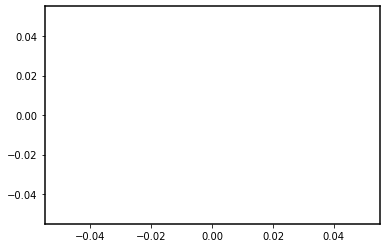

In [30]:
plt.plot()
font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.show()

In [31]:
ddir = "/net/gaia2/data/users/gaia/andrae_xgboost/dr3/"
xgdf = vaex.open(ddir+'table1.hdf5')


gdir = "/net/gaia2/data/users/gaia/gaia-dr3/"

dataFrame = vaex.open( gdir+ "gaia-dr3.hdf5")
dataFrame.join(
    vaex.open(
       gdir+ "gaia-dr3.d/xp_spec.hdf5"
    ),
    inplace=True,
)


dirr = "/Users/users/spirov/ClusterProject/GC_membership/data/"
name = "NGC_6752"
sam = vaex.open(dirr+name+".hdf5")


sampl = sam[sam["memberprob"]>0.85]
#members = dataFrame['source_id'].isin(sampl['source_id'].values)

mdir = "/Users/users/spirov/ClusterProject/"

standardsApogee = vaex.from_csv(mdir+"J_MNRAS_492_1641_Gaia_EDR3 (1)")




In [32]:

clusterFrame = dataFrame.join(standardsApogee, on="source_id",lprefix="d_",how="inner")

bprp = clusterFrame.bp_rp.values
mG = clusterFrame.phot_g_mean_mag.values



In [33]:
centr = np.array([287.717102, -59.984554])
R = np.sqrt( (clusterFrame.ra-centr[0])**2 + (clusterFrame.dec-centr[1])**2 )
clusterFrame["offcenter"] = R
Rs = clusterFrame.offcenter.values

In [34]:
bastardFrame = clusterFrame[clusterFrame.source_id==6632379762251833216]

In [35]:
bastardFrame.column_names

['solution_id',
 'designation',
 'd_source_id',
 'random_index',
 'ref_epoch',
 'd_ra',
 'd_ra_error',
 'd_dec',
 'd_dec_error',
 'd_parallax',
 'd_parallax_error',
 'd_parallax_over_error',
 'd_pm',
 'd_pmra',
 'd_pmra_error',
 'd_pmdec',
 'd_pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'd_astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'd_astrometric_gof_al',
 'd_astrometric_chi2_al',
 'd_astrometric_excess_noise',
 'd_astrometric_excess_noise_sig',
 'd_astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'd_pseudocolour',
 'd_pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'd_visibil

JKC


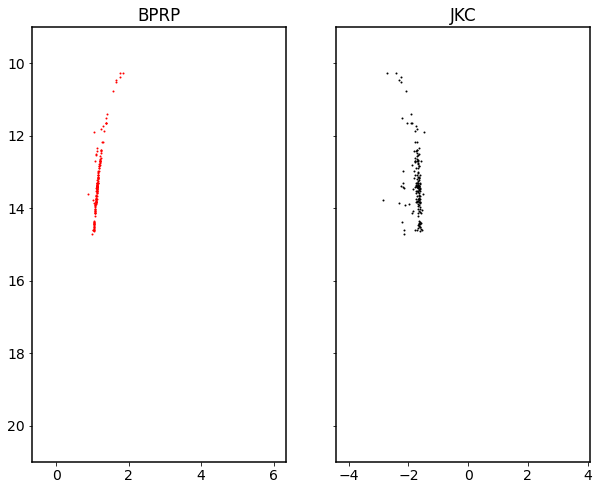

In [36]:
print("JKC")

mG = clusterFrame.phot_g_mean_mag.values

mag = clusterFrame.Jkc_mag_U-clusterFrame.Jkc_mag_B

MPivot = clusterFrame.Jkc_mag_B-clusterFrame.Jkc_mag_I
myCol = mag-MPivot

bprp = clusterFrame.bp_rp.values
Rs = clusterFrame.offcenter.values

clusterFrame["JKC"] = myCol

color =  clusterFrame.JKC.values
xWidth = 7

plt.figure(figsize=(10,8))
ax1 = plt.subplot(121)
plt.plot(bprp, mG, 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")

ax2 = plt.subplot(122, sharey=ax1)
aa = plt.plot(color, mG, 'ko', ms=1)
plt.tick_params('y', labelleft=False)
plt.title("JKC")
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth)

plt.ylim(21, 9)
#plt.suptitle("NGC 6656")

plt.show()


name = "JKB, C_UBI"

In [37]:
standardsApogee = clusterFrame[clusterFrame.phot_g_mean_mag>12.5]

In [38]:
Mgs = standardsApogee["[Mg/Fe]"].values #standardsApogee
Als = standardsApogee["[Al/Fe]"].values

S = np.logical_and(np.isnan(Mgs), np.isnan(Als))

Mgs = Mgs[~S]
Als = Als[~S]

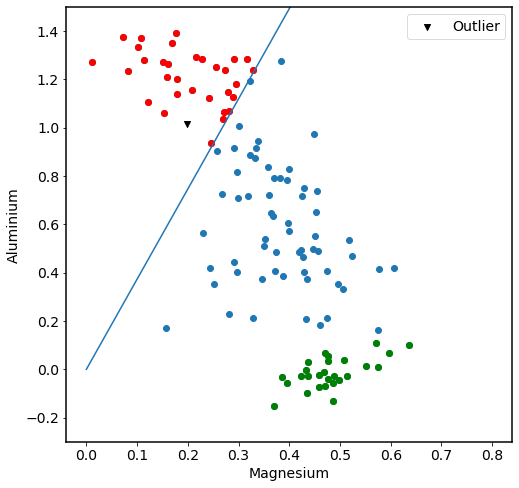

In [39]:
def selfunc(x,angl, minx=0,miny=0):
    m=np.tan(np.deg2rad(angl))
    return (x-minx)*m -miny
    
plt.figure(figsize=(8,8))
plt.scatter(Mgs,Als)
plt.xlabel("Magnesium")
plt.ylabel("Aluminium")


angle = 75



p1 = np.where(selfunc(Mgs,angle)<Als)
plt.scatter(Mgs[p1],Als[p1],c='r')

p2 = np.where(selfunc(Mgs,90-angle)>Als)
plt.scatter(Mgs[p2],Als[p2],c='g')




Xs = np.linspace(0,0.8,60)
Ys = selfunc(Xs,angle)

plt.plot(Xs,Ys)

#plt.xlim(0,0.8)
plt.ylim(-0.3,1.5)

plt.scatter(bastardFrame["[Mg/Fe]"].values,bastardFrame["[Al/Fe]"].values,marker="v",c="k",label="Outlier")
plt.legend()
plt.show()

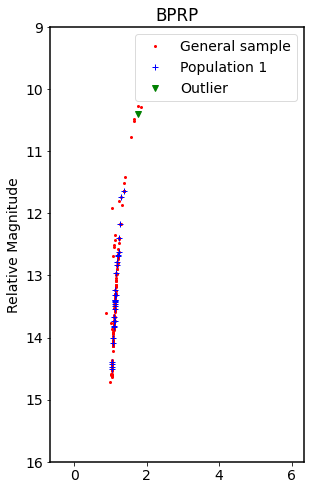

In [40]:



plt.figure(figsize=(10,8))

ax1 = plt.subplot(121)

plt.plot(bprp, mG, 'ro', ms=2,label="General sample")
plt.plot(bprp[p1], mG[p1], 'b+',label="Population 1")
plt.plot(bastardFrame.bp_rp, bastardFrame.phot_g_mean_mag, 'gv',label="Outlier")
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")
plt.ylabel("Relative Magnitude")
plt.ylim(16, 9)
plt.legend()
plt.show()

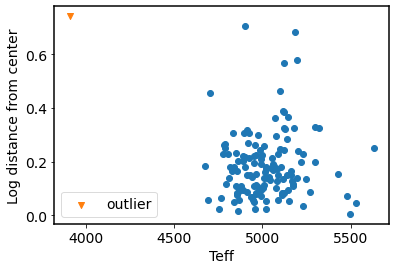

In [41]:
Rs = standardsApogee.offcenter.values
Ts=standardsApogee.Teff.values


plt.scatter(Ts,Rs)
plt.xlabel("Teff")
plt.ylabel("Log distance from center")
plt.scatter(bastardFrame.Teff.values,bastardFrame.offcenter.values,marker="v",label="outlier")
plt.legend()
plt.show()

# Taking Populations for Spectra

In [42]:
tmp1 = standardsApogee.source_id.values[p1]

In [43]:
## Get spectra! 
sampling = np.geomspace(330,1049.9999999999, 361) ## A non-linear sample improves the level of detail in the blue
calibrated_spectra_geom, sampling = gxp.calibrate(tmp1.tolist(), sampling=sampling)

                                                          /31 [00:00<?, ?spec/s]

In [44]:
Gflux = standardsApogee.phot_g_mean_flux.values

Text(0.5, 0, 'Frequency')

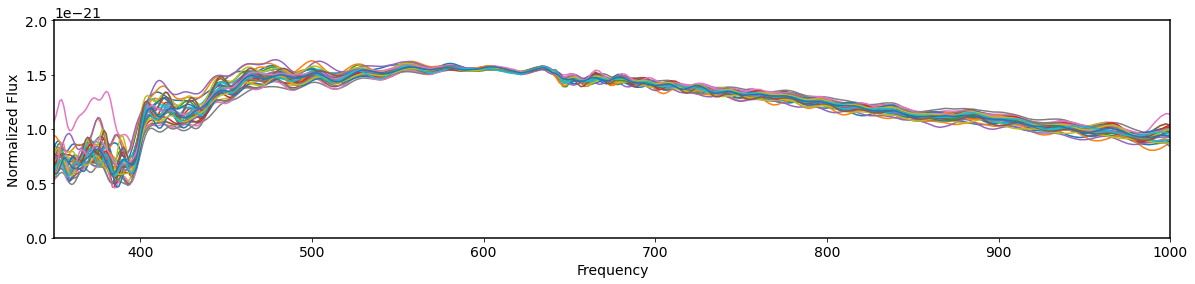

In [45]:

plt.figure(figsize=(20, 4))
for n in np.arange(0,len(p1[0])):
    plt.plot(sampling, calibrated_spectra_geom['flux'][n]/Gflux[p1][n])

plt.xlim(350, 1000)
plt.ylim(0, 2e-21)

plt.ylabel("Normalized Flux")
plt.xlabel("Frequency")

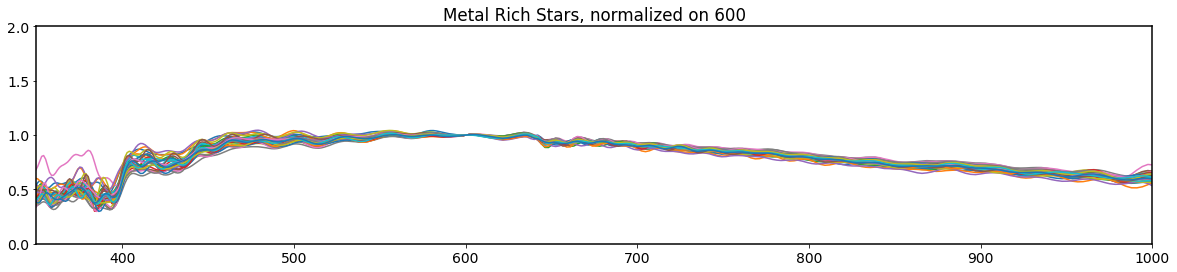

In [46]:
freq0 = 600

RICH = []


plt.figure(figsize=(20, 4))
plt.xlim(350, 1000)
plt.ylim(0, 2)

for n in np.arange(0,len(p1[0])):
    FLUX = calibrated_spectra_geom['flux'][n]
    FLUX = FLUX/FLUX[np.argmin(np.abs(sampling-freq0))]
    RICH.append(FLUX)
    plt.plot(sampling,FLUX)

plt.title(f"Metal Rich Stars, normalized on {freq0}")
    
plt.show()

# Get Poors

In [47]:
tmp2 = standardsApogee.source_id.values[p2]

calibrated_spectra_geom, sampling = gxp.calibrate(tmp2.tolist(), sampling=sampling)

                                                          /27 [00:00<?, ?spec/s]

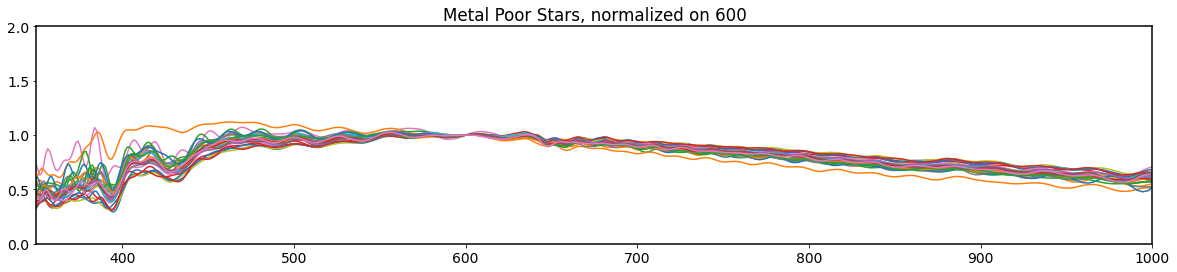

In [48]:

POOR = []


plt.figure(figsize=(20, 4))
plt.xlim(350, 1000)
plt.ylim(0, 2)

for n in np.arange(0,len(p2[0])):
    FLUX = calibrated_spectra_geom['flux'][n]
    FLUX = FLUX/FLUX[np.argmin(np.abs(sampling-freq0))]
    POOR.append(FLUX)
    plt.plot(sampling,FLUX)

plt.title(f"Metal Poor Stars, normalized on {freq0}")
    
plt.show()

# Bigplot

<Figure size 1080x432 with 0 Axes>

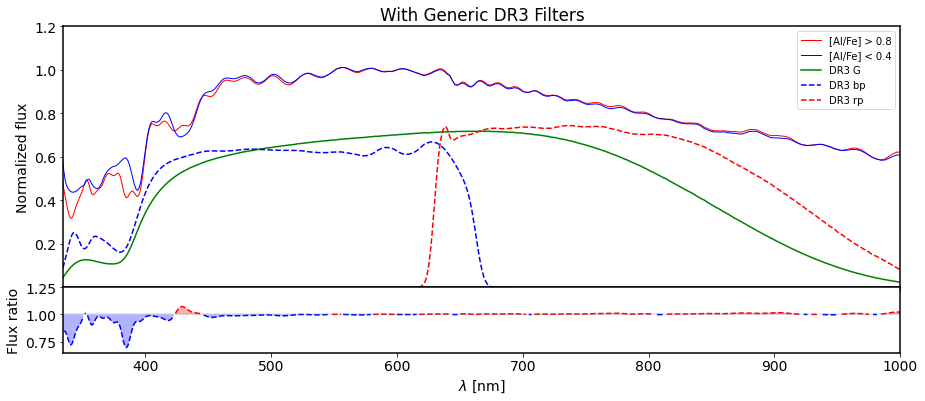

In [49]:
plt.figure(figsize=(15, 6))

axd = plt.figure(figsize=(15,6)).subplot_mosaic(
    """
    B
    B
    B
    B
    A
    """
)

plt.sca(axd['B'])

plt.title("With Generic DR3 Filters")
plt.plot(sampling, np.mean(np.vstack(RICH), axis=0), label='[Al/Fe] > 0.8', lw=1, c='r')
plt.plot(sampling, np.mean(np.vstack(POOR), axis=0), label='[Al/Fe] < 0.4', lw=1, c='b')
plt.ylim(0, 1.2)


lamb, G, ge, Bp, eBp, Rp, eRp  = np.loadtxt("Passbands/passband.dat", unpack=True)
G[G>20]=0
plt.plot(lamb,G,c='g',label="DR3 G")

Bp[Bp>20]=0
plt.plot(lamb,Bp,'b--',label="DR3 bp")

Rp[Rp>20]=0
plt.plot(lamb,Rp,'r--',label="DR3 rp")


plt.legend(fontsize=10)


plt.ylabel('Normalized flux')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.xlim(335, 1000)
plt.ylim(0.001, 1.2)

plt.gca().axes.xaxis.set_ticklabels([])


plt.sca(axd['A'])

VAL = np.mean(np.vstack(RICH), axis=0)/np.mean(np.vstack(POOR), axis=0)

VALred = np.copy(VAL)
VALred[VAL>1] = VAL[VAL>1]
VALred[VAL<1] = np.nan


VALblue = np.copy(VAL)
VALblue[VAL<1] = VAL[VAL<1]
VALblue[VAL>1] = np.nan



plt.plot(sampling, VALblue, label='Al rich/Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich/Al poor', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.xlim(335, 1000)
plt.xlabel('$\lambda$ [nm]')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Flux ratio')

plt.subplots_adjust(hspace=0, wspace=0)
plt.ylim(0.65, 1.25)


plt.show()

<Figure size 1080x432 with 0 Axes>

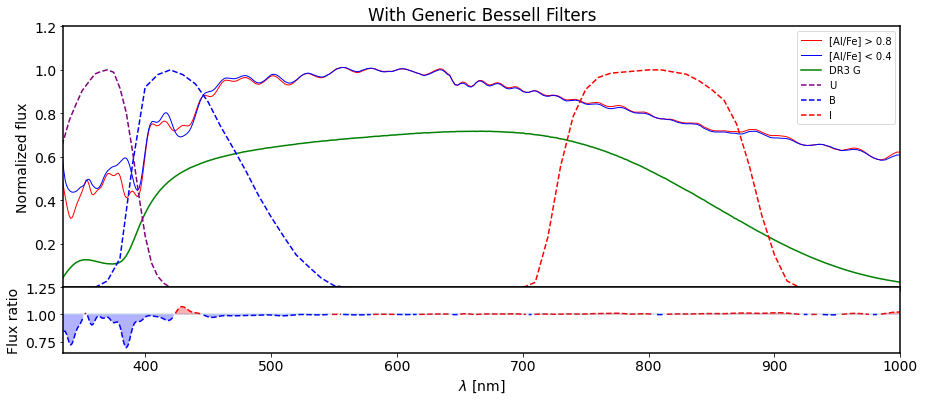

In [50]:

plt.figure(figsize=(15, 6))

axd = plt.figure(figsize=(15,6)).subplot_mosaic(
    """
    B
    B
    B
    B
    A
    """
)

plt.sca(axd['B'])

plt.title("With Generic Bessell Filters")

plt.plot(sampling, np.mean(np.vstack(RICH), axis=0), label='[Al/Fe] > 0.8', lw=1, c='r')
plt.plot(sampling, np.mean(np.vstack(POOR), axis=0), label='[Al/Fe] < 0.4', lw=1, c='b')
plt.ylim(0, 1.2)


G[G>20]=0
plt.plot(lamb,G,c='g',label="DR3 G")

L, U = np.loadtxt("Passbands/Generic_Bessell.U.dat", unpack=True)
L/=10
plt.plot(L,U,"purple",linestyle="--",label="U")

L, B = np.loadtxt("Passbands/Generic_Bessell.B.dat", unpack=True)
L/=10
plt.plot(L,B,"blue",linestyle="--",label="B")

L, I = np.loadtxt("Passbands/Generic_Bessell.I.dat", unpack=True)
L/=10
plt.plot(L,I,"red",linestyle="--",label="I")



plt.legend(fontsize=10)


plt.ylabel('Normalized flux')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.xlim(335, 1000)
plt.ylim(0.001, 1.2)

plt.gca().axes.xaxis.set_ticklabels([])


plt.sca(axd['A'])

VAL = np.mean(np.vstack(RICH), axis=0)/np.mean(np.vstack(POOR), axis=0)

VALred = np.copy(VAL)
VALred[VAL>1] = VAL[VAL>1]
VALred[VAL<1] = np.nan


VALblue = np.copy(VAL)
VALblue[VAL<1] = VAL[VAL<1]
VALblue[VAL>1] = np.nan



plt.plot(sampling, VALblue, label='Al rich/Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich/Al poor', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.xlim(335, 1000)
plt.xlabel('$\lambda$ [nm]')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Flux ratio')

plt.subplots_adjust(hspace=0, wspace=0)
plt.ylim(0.65, 1.25)

plt.show()


<Figure size 1080x432 with 0 Axes>

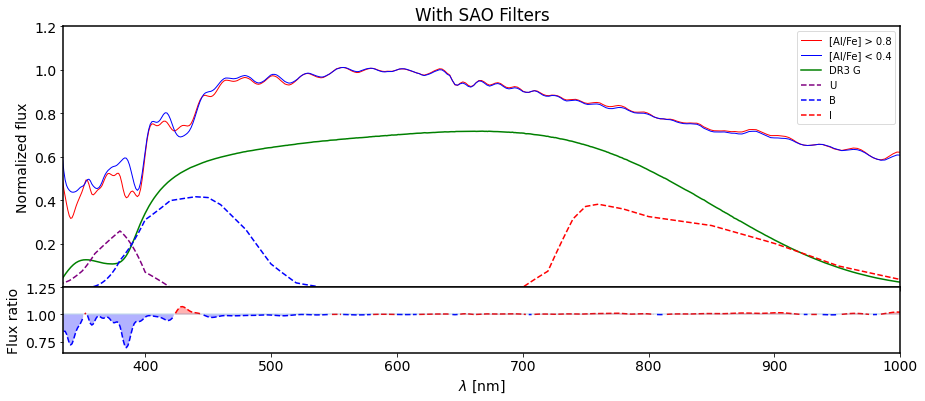

In [51]:

plt.figure(figsize=(15, 6))

axd = plt.figure(figsize=(15,6)).subplot_mosaic(
    """
    B
    B
    B
    B
    A
    """
)

plt.sca(axd['B'])

plt.title("With SAO Filters")

plt.plot(sampling, np.mean(np.vstack(RICH), axis=0), label='[Al/Fe] > 0.8', lw=1, c='r')
plt.plot(sampling, np.mean(np.vstack(POOR), axis=0), label='[Al/Fe] < 0.4', lw=1, c='b')
plt.ylim(0, 1.2)


G[G>20]=0
plt.plot(lamb,G,c='g',label="DR3 G")

L, U = np.loadtxt("Passbands/SAO_SCORPIO.U.dat", unpack=True)
L/=10
plt.plot(L,U,"purple",linestyle="--",label="U")

L, B = np.loadtxt("Passbands/SAO_SCORPIO.B.dat", unpack=True)
L/=10
plt.plot(L,B,"blue",linestyle="--",label="B")

L, I = np.loadtxt("Passbands/SAO_SCORPIO.I.dat", unpack=True)
L/=10
plt.plot(L,I,"red",linestyle="--",label="I")



plt.legend(fontsize=10)


plt.ylabel('Normalized flux')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.xlim(335, 1000)
plt.ylim(0.001, 1.2)

plt.gca().axes.xaxis.set_ticklabels([])


plt.sca(axd['A'])

VAL = np.mean(np.vstack(RICH), axis=0)/np.mean(np.vstack(POOR), axis=0)

VALred = np.copy(VAL)
VALred[VAL>1] = VAL[VAL>1]
VALred[VAL<1] = np.nan


VALblue = np.copy(VAL)
VALblue[VAL<1] = VAL[VAL<1]
VALblue[VAL>1] = np.nan



plt.plot(sampling, VALblue, label='Al rich/Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich/Al poor', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.xlim(335, 1000)
plt.xlabel('$\lambda$ [nm]')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Flux ratio')

plt.subplots_adjust(hspace=0, wspace=0)
plt.ylim(0.65, 1.25)

plt.show()


In [52]:
for c in clusterFrame.get_column_names():
    print(c)

solution_id
designation
d_source_id
random_index
ref_epoch
d_ra
d_ra_error
d_dec
d_dec_error
d_parallax
d_parallax_error
d_parallax_over_error
d_pm
d_pmra
d_pmra_error
d_pmdec
d_pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
d_astrometric_n_good_obs_al
astrometric_n_bad_obs_al
d_astrometric_gof_al
d_astrometric_chi2_al
d_astrometric_excess_noise
d_astrometric_excess_noise_sig
d_astrometric_params_solved
astrometric_primary_flag
nu_eff_used_in_astrometry
d_pseudocolour
d_pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
d_visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd

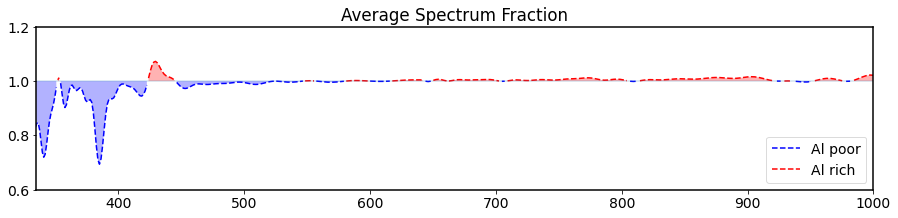

In [53]:
plt.figure(figsize=(15, 3))
plt.plot(sampling, VALblue, label='Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.ylim(0.6, 1.2)
plt.legend()
plt.xlim(335, 1000)
plt.title("Average Spectrum Fraction")

plt.show()

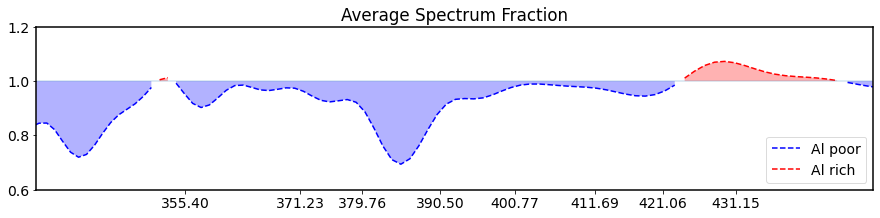

In [54]:
plt.figure(figsize=(15, 3))
plt.plot(sampling, VALblue, label='Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.ylim(0.6, 1.2)
plt.legend()
plt.xlim(335, 450)
plt.title("Average Spectrum Fraction")

Lms = np.array([3554.01,3712.33	,3797.58,3905.05,4007.74,4116.89,4210.59,4311.51])/10

plt.xticks(Lms)
plt.show()

<Figure size 1080x216 with 0 Axes>

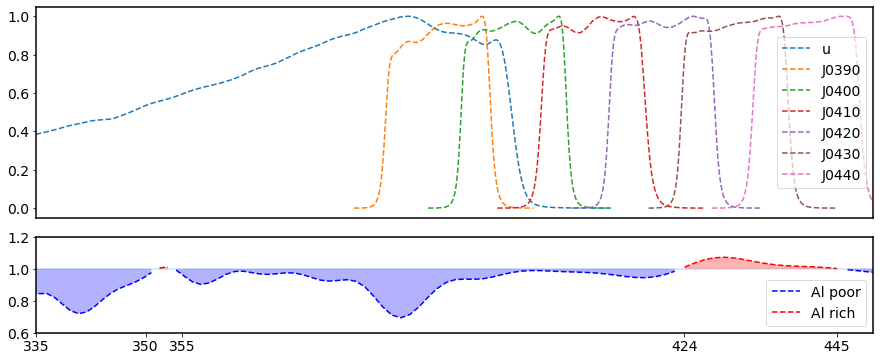

In [55]:
plt.figure(figsize=(15, 3))

axd = plt.figure(figsize=(15,6)).subplot_mosaic(
    """
    A
    A
    B
    """
)

plt.sca(axd['B'])


plt.plot(sampling, VALblue, label='Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.ylim(0.6, 1.2)
plt.legend()
plt.xlim(335, 450)


names = ["OAJ_JPAS.u.dat","OAJ_JPAS.J0390.dat","OAJ_JPAS.J0400.dat","OAJ_JPAS.J0410.dat","OAJ_JPAS.J0420.dat","OAJ_JPAS.J0430.dat","OAJ_JPAS.J0440.dat"]
plt.xticks([335,350,355,424,445])


plt.sca(axd['A'])

#plt.title("Points of Transition")

for nam in names:
    L, F = np.loadtxt("Passbands/"+nam, unpack=True)
    L/=10
    F/=max(F)
    plt.plot(L,F,linestyle="--",label=nam[9:-4])

plt.xticks([])


plt.xlim(335, 450)
plt.legend()

plt.show()

<Figure size 1080x216 with 0 Axes>

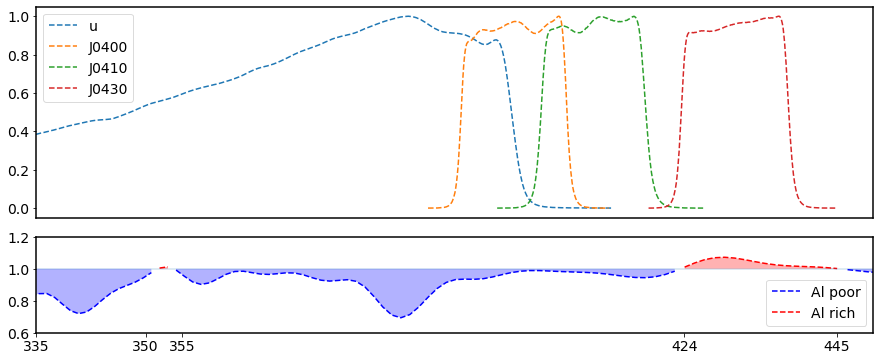

In [59]:
plt.figure(figsize=(15, 3))

axd = plt.figure(figsize=(15,6)).subplot_mosaic(
    """
    A
    A
    B
    """
)

plt.sca(axd['B'])


plt.plot(sampling, VALblue, label='Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.ylim(0.6, 1.2)
plt.legend()
plt.xlim(335, 450)


names = ["OAJ_JPAS.u.dat","OAJ_JPAS.J0400.dat","OAJ_JPAS.J0410.dat","OAJ_JPAS.J0430.dat"]
plt.xticks([335,350,355,424,445])


plt.sca(axd['A'])

#plt.title("Points of Transition")

for nam in names:
    L, F = np.loadtxt("Passbands/"+nam, unpack=True)
    L/=10
    F/=max(F)
    plt.plot(L,F,linestyle="--",label=nam[9:-4])

plt.xticks([])

plt.xlim(335, 450)

plt.legend()

plt.show()

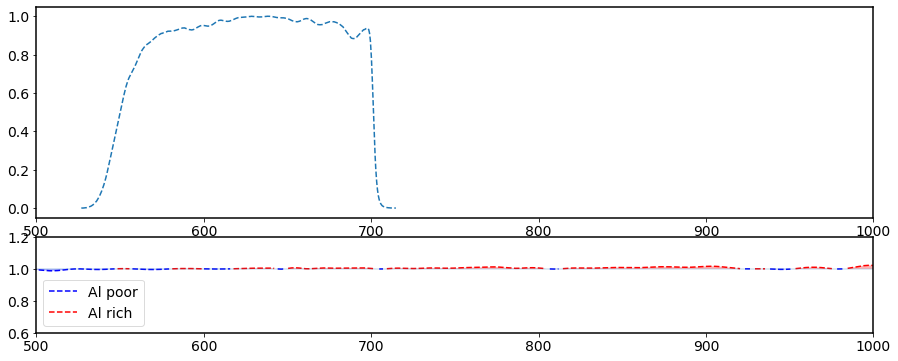

In [57]:
axd = plt.figure(figsize=(15,6)).subplot_mosaic(
    """
    A
    A
    B
    """
)

plt.sca(axd['B'])

plt.plot(sampling, VALblue, label='Al poor', ls='--', c='b')
plt.fill_between(sampling, VALblue, 1, fc='b', alpha=0.3)
plt.plot(sampling, VALred, label='Al rich', ls='--', c='r')
plt.fill_between(sampling, VALred, 1, fc='r', alpha=0.3)
plt.axhline(1, alpha=.2)
plt.ylim(0.6, 1.2)
plt.legend()
plt.xlim(500, 1000)


plt.sca(axd['A'])

L, F = np.loadtxt("Passbands/OAJ_JPAS.rSDSS.dat", unpack=True)
L/=10
F/=max(F)
plt.plot(L,F,linestyle="--",label=nam[9:-4])
plt.xlim(500, 1000)

plt.show()